<a href="https://colab.research.google.com/github/MohamedHOmar/Lab/blob/main/HSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers
!pip install -q simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data_path = "/content/drive/MyDrive/Hate.csv"
df = pd.read_csv(data_path)

In [ ]:
import tensorflow as tf
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
label_categories = {0: 'no hate', 1: 'hate'}
df.drop(columns=['Split'], inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Download the Somali stopwords file from a different source
!wget https://raw.githubusercontent.com/MohamedHOmar/Somali-Stopword/main/somali_stopwords.txt

# Read the stopwords from the local file
with open('somali_stopwords.txt', 'r') as file:
    somali_stopwords = [line.strip() for line in file]

# Use the local stopwords in the stopwords.words() function
default_stopwords = set(somali_stopwords)

--2024-05-11 07:12:13--  https://raw.githubusercontent.com/MohamedHOmar/Somali-Stopword/main/somali_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629 [text/plain]
Saving to: ‘somali_stopwords.txt’

somali_stopwords.tx 100%[===================>]     629  --.-KB/s    in 0s      

2024-05-11 07:12:13 (23.5 MB/s) - ‘somali_stopwords.txt’ saved [629/629]



In [ ]:
import pandas as pd
import re
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join(word for word in text.split() if word not in somali_stopwords)
    return text
# Assuming 'Text' column contains the comments
df['Text'] = df['Text'].apply(clean_text)

# Now your text data is cleaned


In [ ]:
df.head(5)

,Text,Label
0,meshas hal mar tag gudoomiye ul uqaado,0
1,markiini horeba diinta dhinac baad haysateen,1
2,faarmaajo wasaq wasaq dhalay wecel naarta alle...,1
3,dalka intu hawiye kunolyahay raxmad malahan,1
4,nin xil iska casilaya hadaad aragto nin nool,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features = 10000  # maximum number of words to keep
max_len = 100  # maximum sequence length

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X, maxlen=max_len)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Label'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'].astype(int), random_state=42, test_size=0.2)


In [ ]:
print("Maximum sequence length:", X.shape[1])

Maximum sequence length: 100


In [ ]:
import numpy as np
y = np.array(df["Label"])

In [ ]:
print(X.shape)

(7417, 100)


**LSTM**

In [ ]:
# Define the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
embedding_dim = 128
lstm_units = 64
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(lstm_units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

Epoch 1/5
47/47 - 48s - loss: 0.6784 - accuracy: 0.5645 - val_loss: 0.6727 - val_accuracy: 0.5775 - 48s/epoch - 1s/step
Epoch 2/5
47/47 - 24s - loss: 0.6450 - accuracy: 0.6541 - val_loss: 0.6374 - val_accuracy: 0.6327 - 24s/epoch - 503ms/step
Epoch 3/5
47/47 - 22s - loss: 0.5283 - accuracy: 0.7484 - val_loss: 0.5740 - val_accuracy: 0.6914 - 22s/epoch - 476ms/step
Epoch 4/5
47/47 - 24s - loss: 0.3827 - accuracy: 0.8338 - val_loss: 0.5956 - val_accuracy: 0.7177 - 24s/epoch - 514ms/step
Epoch 5/5
47/47 - 24s - loss: 0.2872 - accuracy: 0.8780 - val_loss: 0.6445 - val_accuracy: 0.7001 - 24s/epoch - 513ms/step


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy_model = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_model)

47/47 [==============================] - 2s 29ms/step
Accuracy: 0.7001347708894878


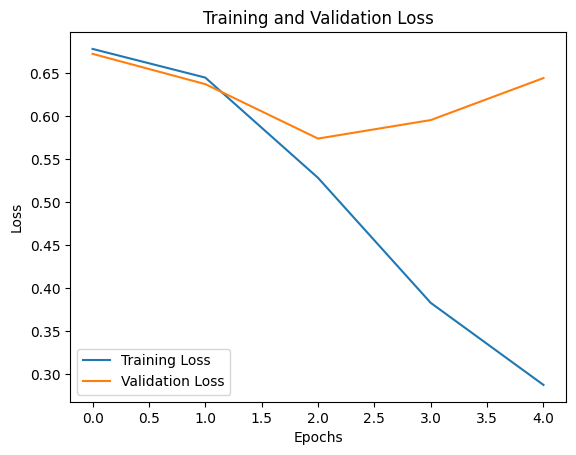

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

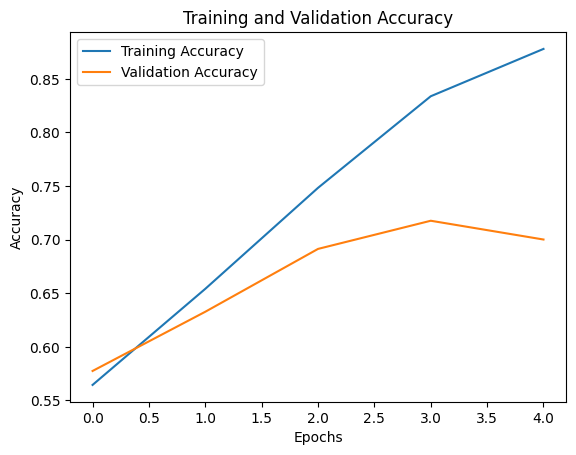

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

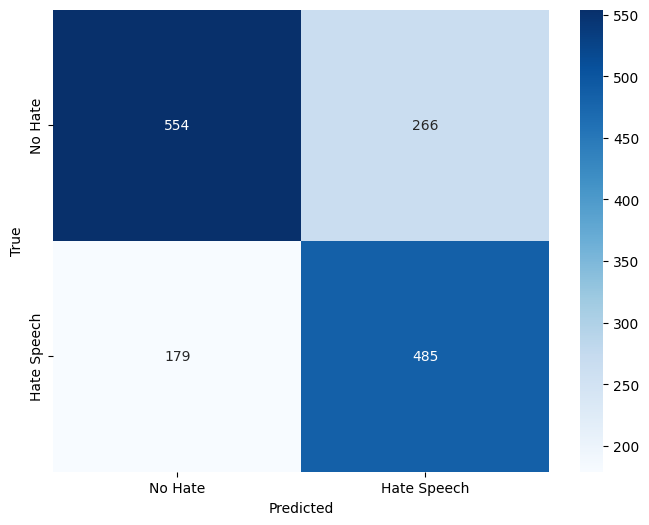

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

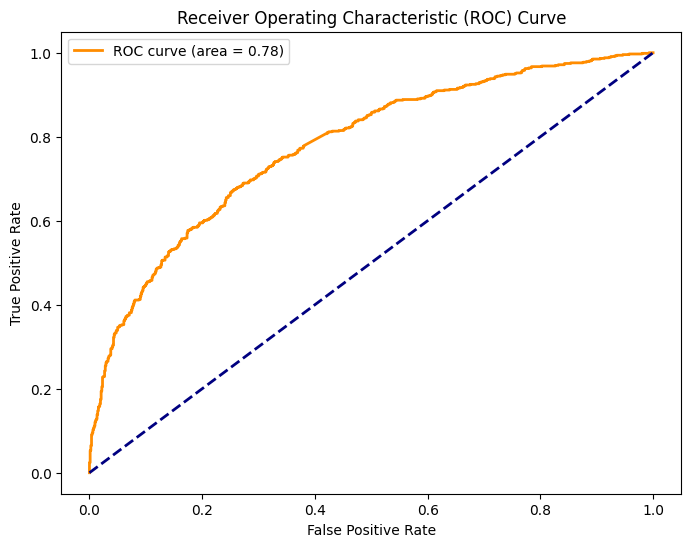

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
new_input = "majerten waa qabiil aaad xun"  #Means "Majerten are the worst tribe"
new_input = clean_text(new_input)
new_input = tokenizer.texts_to_sequences([new_input])
new_input = pad_sequences(new_input, maxlen=X.shape[1])
prediction_prob = model.predict(new_input)
predicted_class = "Hate Speech" if prediction_prob > 0.5 else "No Hate "
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 74ms/step
Predicted Class: Hate Speech


In [ ]:
new_input = "waa shidantahay"  #Means "You are beautiful"
new_input = clean_text(new_input)
new_input = tokenizer.texts_to_sequences([new_input])
new_input = pad_sequences(new_input, maxlen=X.shape[1])
prediction_prob = model.predict(new_input)
predicted_class = "Hate Speech" if prediction_prob > 0.5 else "No Hate "
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 66ms/step
Predicted Class: No Hate 


**CNN Model**



In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling1D
embedding_dim = 128
num_filters = 64
kernel_size = 3  # You can adjust this based on your specific task
pool_size = 2

model3 = Sequential()
model3.add(Embedding(max_features, embedding_dim, input_length=max_len))
model3.add(Conv1D(num_filters, kernel_size, activation='relu'))
model3.add(MaxPooling1D(pool_size))
model3.add(Conv1D(num_filters, kernel_size, activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))


In [ ]:
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])


In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 64)            12352     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 64)               

In [ ]:
history = model3.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
93/93 [==============================] - 9s 99ms/step - loss: 0.3073 - accuracy: 0.8950 - val_loss: 0.5590 - val_accuracy: 0.7345
Epoch 2/5
93/93 [==============================] - 10s 107ms/step - loss: 0.2520 - accuracy: 0.9177 - val_loss: 0.5809 - val_accuracy: 0.7392
Epoch 3/5
93/93 [==============================] - 7s 77ms/step - loss: 0.2117 - accuracy: 0.9331 - val_loss: 0.6096 - val_accuracy: 0.7352
Epoch 4/5
93/93 [==============================] - 9s 96ms/step - loss: 0.1786 - accuracy: 0.9452 - val_loss: 0.6392 - val_accuracy: 0.7352
Epoch 5/5
93/93 [==============================] - 7s 78ms/step - loss: 0.1546 - accuracy: 0.9518 - val_loss: 0.6829 - val_accuracy: 0.7325


In [ ]:
# Evaluate the model
y_pred_prob = model3.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy_model3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_model3)

47/47 [==============================] - 1s 13ms/step
Accuracy: 0.7324797843665768


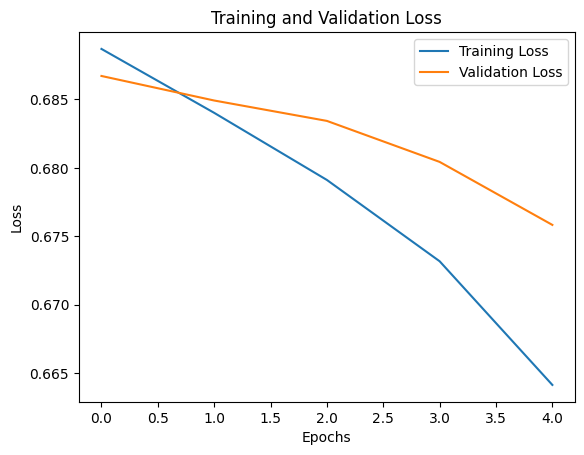

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

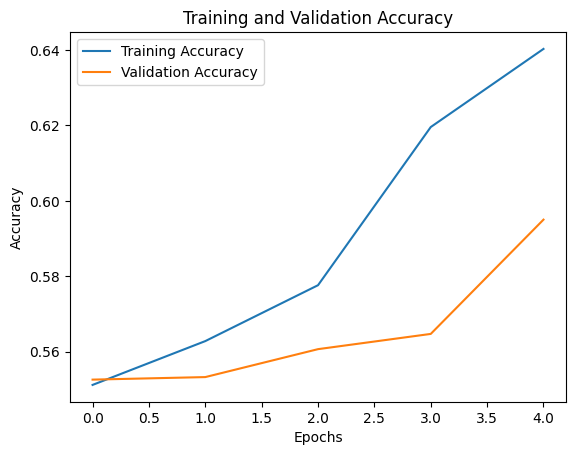

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

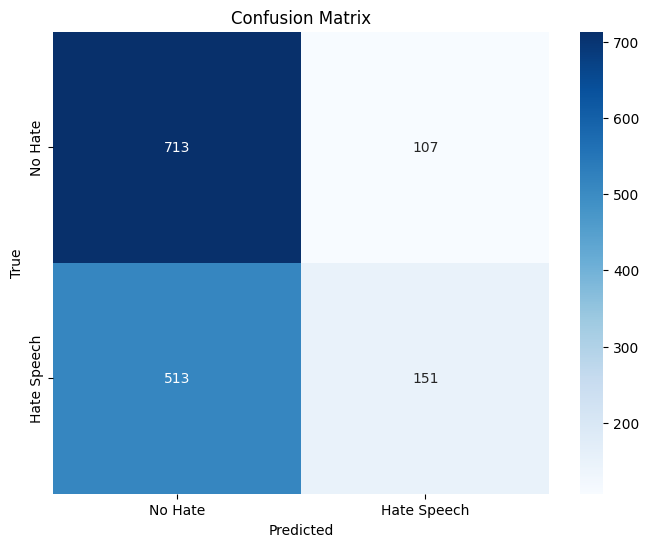

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

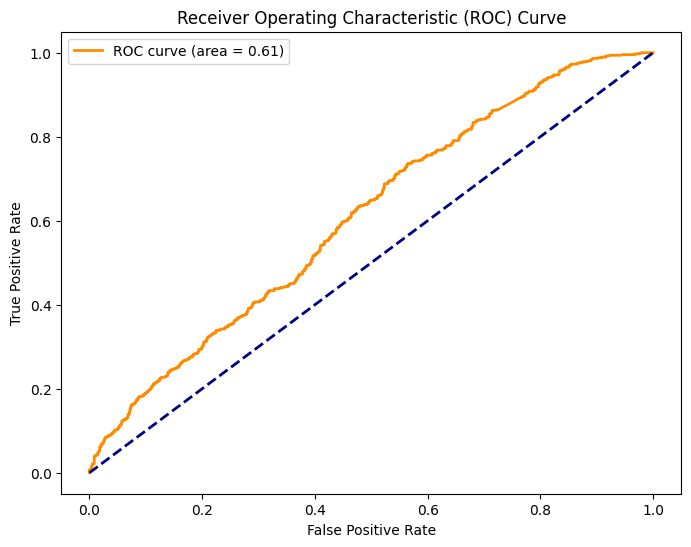

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
new_input = "waa naxariis badantahay" #Means "You are so kind"
new_input = clean_text(new_input)
new_input = tokenizer.texts_to_sequences([new_input])
new_input = pad_sequences(new_input, maxlen=X.shape[1])
prediction_prob = model3.predict(new_input)
predicted_class = "Hate Speech" if prediction_prob > 0.5 else "No Hate"
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 21ms/step
Predicted Class: No Hate


In [ ]:
new_input = "dhilodaa tahay was" #Means "You are F**king wh*re"
new_input = clean_text(new_input)
new_input = tokenizer.texts_to_sequences([new_input])
new_input = pad_sequences(new_input, maxlen=X.shape[1])
prediction_prob = model3.predict(new_input)
predicted_class = "Hate Speech" if prediction_prob > 0.5 else "No Hate"
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 21ms/step
Predicted Class: No Hate


**RNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim = 128
hidden_units = 128
dropout_rate = 0.5
learning_rate = 0.0001

model2 = Sequential()
model2.add(Embedding(max_features, embedding_dim, input_length=max_len))
model2.add(SimpleRNN(hidden_units, activation='tanh'))
model2.add(Dropout(dropout_rate))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Stop training if no improvement after 3 epochs

# Train the model with Early Stopping
history = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
93/93 [==============================] - 51s 93ms/step - loss: 0.6848 - accuracy: 0.5567 - val_loss: 0.6843 - val_accuracy: 0.5445
Epoch 2/10
93/93 [==============================] - 8s 89ms/step - loss: 0.6689 - accuracy: 0.5941 - val_loss: 0.6853 - val_accuracy: 0.5404
Epoch 3/10
93/93 [==============================] - 8s 86ms/step - loss: 0.6502 - accuracy: 0.6358 - val_loss: 0.6783 - val_accuracy: 0.5519
Epoch 4/10
93/93 [==============================] - 9s 96ms/step - loss: 0.6250 - accuracy: 0.6779 - val_loss: 0.6721 - val_accuracy: 0.5660
Epoch 5/10
93/93 [==============================] - 8s 81ms/step - loss: 0.5839 - accuracy: 0.7389 - val_loss: 0.6565 - val_accuracy: 0.5964
Epoch 6/10
93/93 [==============================] - 9s 99ms/step - loss: 0.5314 - accuracy: 0.7826 - val_loss: 0.6440 - val_accuracy: 0.6199
Epoch 7/10
93/93 [==============================] - 10s 110ms/step - loss: 0.4677 - accuracy: 0.8293 - val_loss: 0.6245 - val_accuracy: 0.6509
Epoch 8/10

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model
y_pred_prob = model2.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy_model2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_model2)


47/47 [==============================] - 1s 27ms/step
Accuracy: 0.6731805929919138


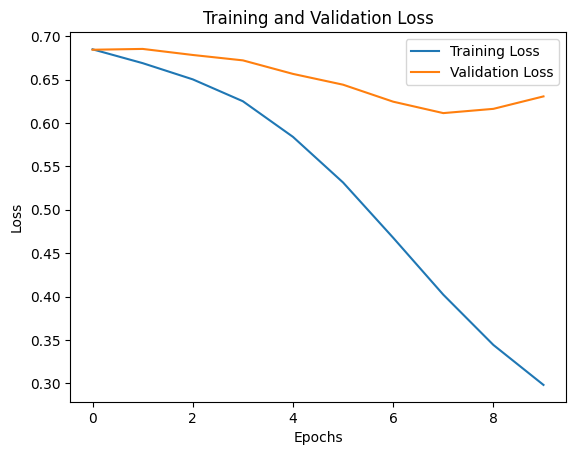

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

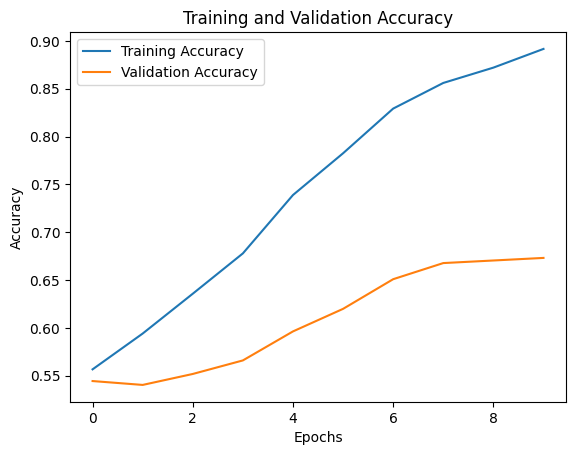

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

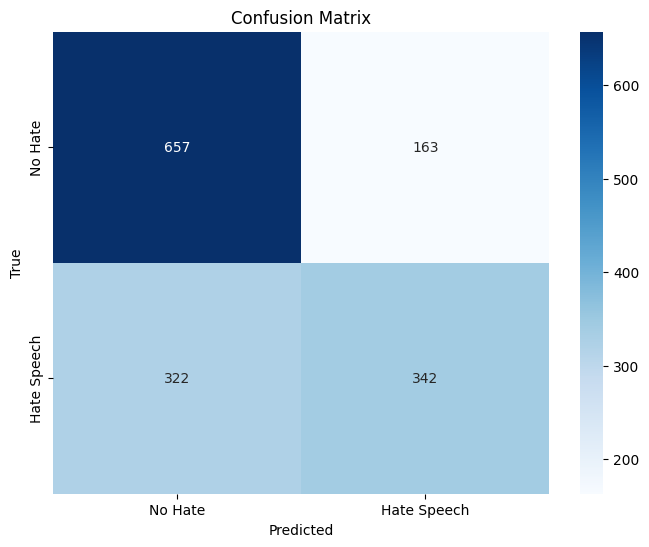

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate', 'Hate Speech'], yticklabels=['No Hate', 'Hate Speech'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

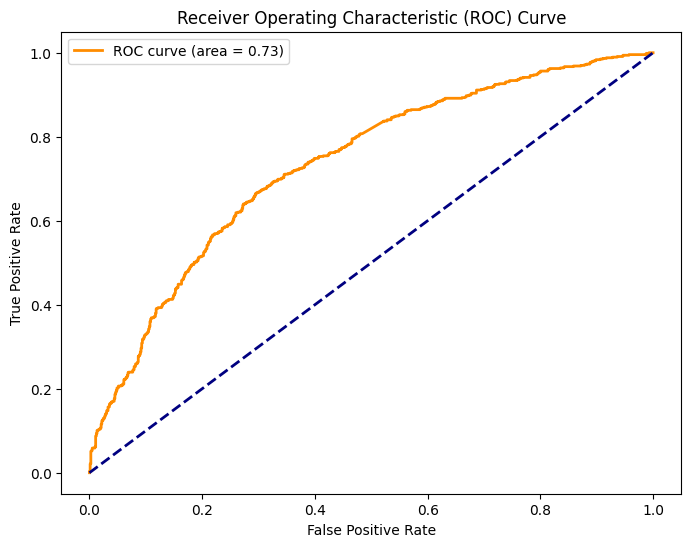

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
new_input = "waa naxariis badantahay" #Means "You are so kind"
new_input = clean_text(new_input)
new_input = tokenizer.texts_to_sequences([new_input])
new_input = pad_sequences(new_input, maxlen=X.shape[1])
prediction_prob = model2.predict(new_input)
predicted_class = "Hate Speech" if prediction_prob > 0.5 else "No Hate"
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 40ms/step
Predicted Class: No Hate


In [ ]:
from sklearn.metrics import f1_score

# Predict probabilities for the test set
y_pred_prob = model2.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate F1 score
f1_rnn = f1_score(y_test, y_pred)

print("RNN F1 Score:", f1_rnn)


47/47 [==============================] - 1s 30ms/step
RNN F1 Score: 0.5851154833190763
